In [1]:
import pandas as pd
import os
import json
train_annotation_data = json.load(open(os.path.join('..', 'datasets', 'Annotations', 'v2_mscoco_train2014_annotations.json')))
train_annotation = pd.DataFrame(train_annotation_data["annotations"])
train_question_data = json.load(open(os.path.join('..', 'datasets', 'Questions', 'v2_OpenEnded_mscoco_train2014_questions.json')))
train_question = pd.DataFrame(train_question_data["questions"])


79 76 134 219
86 138 103 164
95 74 103 85
96 75 102 82
100 80 113 106


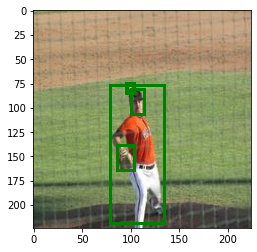

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torchvision.transforms as transforms
from matplotlib.patches import Rectangle
from PIL import Image
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval().to(device)

idx = 0
idx_answers = pd.DataFrame(train_annotation.loc[idx, 'answers'])
quest = train_annotation.loc[idx, 'question_id']
question = train_question[train_question['question_id']==quest]['question'][idx]
image_id = train_question[train_question['question_id']==quest]['image_id'][idx]
image_path = os.path.join('..','datasets','Resized_Image','train2014',f'COCO_train2014_{image_id:012}.jpg')

normalize: transforms.Normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
)

image_rgb = Image.open(os.path.join('..','datasets','Resized_Images','train2014', f'COCO_train2014_{image_id:012}.jpg')).convert("RGB")

transform_without_normalize = transforms.Compose([
    transforms.ToTensor(),
    #normalize,
])
transform_with_normalize = transforms.Compose([
    transforms.ToTensor(),
    normalize,
])
image_dict = {
    "with normalize": transform_without_normalize(image_rgb).unsqueeze(0).to(device),
    "without normalize": transform_without_normalize(image_rgb).unsqueeze(0).to(device)
}
image_with_nomalize = transform_with_normalize(image_rgb).unsqueeze(0).to(device)
result = model(image)
fig,ax = plt.subplots(1)

ax.imshow(image_rgb)
for x, obj in enumerate(result):
    # obj's scores is descending
    boxes = obj["boxes"]
    for box in boxes:
        x1, y1, x2, y2 = int(box[0].item()), int(box[1].item()), int(box[2].item()), int(box[3].item())
        print(x1,y1,x2,y2)
        box_plot = Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='green', linewidth=3)
        ax.add_patch(box_plot)
plt.show()
